In [1]:
import bm_utils

paths = ["../../preprocessing/2023_6less.npz",
         "../../preprocessing/2024_6less.npz"]
X_train, X_test, Y_train, Y_test = bm_utils.load_dataset(paths, test_size=0.1, random_state=42)
print(len(X_train), len(X_test))

130683 14521


In [2]:
# benchmark to use
import chess
from stockfish import Stockfish

stockfish = Stockfish(path="../../bin/stockfish-ubuntu-x86-64-avx2")

# picks the top 5 stockfish moves
def stockfish_predict(board):
    stockfish.set_fen_position(board.fen())
    top5_moves = stockfish.get_top_moves(5)
    top5_moves = [chess.Move.from_uci(stockfish_data['Move']) for stockfish_data in top5_moves]

    return top5_moves

100%|██████████| 50/50 [00:04<00:00, 10.59it/s]

Top-1 Accuracy: 0.380
Top-5 Accuracy: 0.860


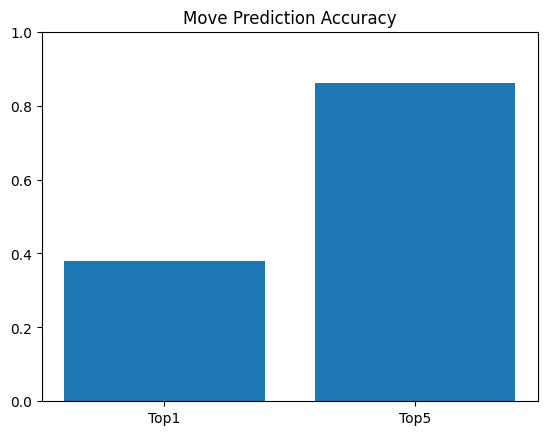

(0.38, 0.86)

In [3]:
bm_utils.evaluate(X_test, Y_test, stockfish_predict)